# Walk through: Knowledge Discovery in Big Data


> Illustration with 5-year nation-wide air pollution data of Japan



## Introduction

Knowledge discovery in data in data has the following five steps:



1.   Selection : selecting the right data from the whole data available
2.   Preprocessing : Modifying the data to remove abnormalities and bring consistency
3.   Transform : Changing the data format so that the machine learning algorithm can accept it.
4.   Data mining : Applying the knowledge discovery algorithms
5.   Interpretation/Evalution : Analyze the discovered knowledge.


In the below figure, left-side presents the KDD process and the right-side illustrates the example. Using the air pollution data, we illustrate the KDD process.

![](https://drive.google.com/uc?export=view&id=1Et62teoZoTYQgxGCw3qRiJniJLD1G3c6)

***

## Step 0: Data


![](https://drive.google.com/uc?export=view&id=1E3UZfjL8IDqtOTmECm3sTm5fHPr57GoC)


## About the data
Air pollution is a significant cause of the cardio-respiratory problems reported in Japan. On average, forty thousand people die annually in Japan due to pollution [(click here)](https://www.statista.com/statistics/935022/number-deaths-air-pollution-japan/#:~:text=In%202019%2C%20the%20number%20of,attributable%20to%20air%20pollution%20exposure.). To confront this problem, The Ministry of Environment, Japan, has set up a sensor network system, [SORAMAME](https://soramame.env.go.jp/), to monitor pollution in Japan. Each sensor in this network collects pollution levels of various air pollutants (e.g., SO2, NO2, and PM2.5) at hourly intervals.

In this experiment, we will be using the 5+ years of PM 2.5 pollutants data generated by all sensors situated throughout Japan.

### Step 0.1: Download the air pollution dataset

In [1]:
!wget https://www.dropbox.com/s/wa8d1sujzlx56hh/ETL_DATA_new.csv

--2024-09-19 10:39:07--  https://www.dropbox.com/s/wa8d1sujzlx56hh/ETL_DATA_new.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/xfqhfaqam1mbvmlapv5z1/ETL_DATA_new.csv?rlkey=fcox2uze73hrreid6e78nvufg [following]
--2024-09-19 10:39:08--  https://www.dropbox.com/scl/fi/xfqhfaqam1mbvmlapv5z1/ETL_DATA_new.csv?rlkey=fcox2uze73hrreid6e78nvufg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd337bf50525d26626ad48a81b6.dl.dropboxusercontent.com/cd/0/inline/Ca3FO8ssVzsXTs9BTItFReO9GxYfrfCpYnyhMqAnC5NcF0KP3YklHRd1zI8xWn6lMLYdlmBta1UUCcsnrzHKL2ohFJmxvS-bIHRsH1s8QWpumSjFRHFmjIy784RlaVkTNu0KmMAEZ-KUyufllETGMaEz/file# [following]
--2024-09-19 10:39:09--  https://ucd337bf50525d26626ad48a81b6.dl.dropboxusercontent.co

### Step 0.2: Read the dataset and view it

In [2]:
import pandas as pd
dataset = pd.read_csv('ETL_DATA_new.csv', index_col=0)

dataset
# you can notice that dataset is collected from 2018-01-01 01:00:00 hours to 2023-04-25 22:00:00 hours (5+ years)

,TimeStamp,Point(139.0794379 36.3727776),Point(139.1051411 36.3963822),Point(139.0960211 36.4047323),Point(139.0428727 36.3816035),Point(138.9955116 36.33801589999999),Point(139.342672 36.4105658),Point(139.3526243 36.3695416),Point(139.1945766 36.31351160000001),Point(139.2076974 36.3034767),...,Point(139.9418164 36.7656467),Point(140.0549894 36.9688923),Point(139.8775674 36.3847082),Point(139.9101767 36.4393022),Point(139.9074816 36.4445767),Point(140.0934838 36.4673588),Point(139.7422865 36.2305774),Point(139.7151723 36.822353),Point(140.1510903 36.6598314),Unnamed: 1832
,,,,,,,,,,,,,,,,,,,,,
0,2018-01-01 01:00:00,NaN,NaN,5.0,13.0,18.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,4.0,NaN
1,2018-01-01 02:00:00,NaN,NaN,11.0,12.0,22.0,15.0,NaN,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,9.0,NaN,NaN,5.0,NaN
2,2018-01-01 03:00:00,NaN,NaN,7.0,12.0,19.0,16.0,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,10.0,NaN,NaN,6.0,NaN
3,2018-01-01 04:00:00,NaN,NaN,5.0,11.0,16.0,11.0,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,11.0,NaN,NaN,11.0,NaN
4,2018-01-01 05:00:00,NaN,NaN,6.0,11.0,10.0,8.0,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,8.0,NaN,NaN,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46000,2023-04-25 18:00:00,NaN,NaN,NaN,22.0,3.0,15.0,NaN,NaN,NaN,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
46001,2023-04-25 19:00:00,NaN,NaN,NaN,21.0,2.0,19.0,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
46002,2023-04-25 20:00:00,NaN,NaN,NaN,20.0,10.0,19.0,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN


Observations:

> 1. __Format of the dataset:__

     timestamp _tabSpace_ sensorLocation1 _tabSpace_ sensorLocation2 _tabSpace_ ... _tabSpace_ sensorLocationN


> 2. If a sensor does not have a location information, it will have the title "unnamed"

> 3. "NaN" value in a cell provides the information that the corresponding sensor has not recorded the value of an air pollutant at a particular timestamp




***

### Step 1: Selection



![](https://drive.google.com/uc?export=view&id=1E0aMqWVomUK54cI3MF8AXS9i-ZXwCp_W)

#### Step 1.1: Removing timestamp information

Since the index of the data implicitly records the timestamp information, we _select_ the data without timestamp. In other words, our target data is the data without timestamp information.

In [3]:
dataset.drop('TimeStamp', inplace=True, axis=1)

dataset

,Point(139.0794379 36.3727776),Point(139.1051411 36.3963822),Point(139.0960211 36.4047323),Point(139.0428727 36.3816035),Point(138.9955116 36.33801589999999),Point(139.342672 36.4105658),Point(139.3526243 36.3695416),Point(139.1945766 36.31351160000001),Point(139.2076974 36.3034767),Point(139.3817322 36.2909131),...,Point(139.9418164 36.7656467),Point(140.0549894 36.9688923),Point(139.8775674 36.3847082),Point(139.9101767 36.4393022),Point(139.9074816 36.4445767),Point(140.0934838 36.4673588),Point(139.7422865 36.2305774),Point(139.7151723 36.822353),Point(140.1510903 36.6598314),Unnamed: 1832
,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,5.0,13.0,18.0,20.0,NaN,NaN,NaN,23.0,...,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,4.0,NaN
1,NaN,NaN,11.0,12.0,22.0,15.0,NaN,NaN,NaN,32.0,...,NaN,6.0,NaN,NaN,NaN,9.0,NaN,NaN,5.0,NaN
2,NaN,NaN,7.0,12.0,19.0,16.0,NaN,NaN,NaN,32.0,...,NaN,0.0,NaN,NaN,NaN,10.0,NaN,NaN,6.0,NaN
3,NaN,NaN,5.0,11.0,16.0,11.0,NaN,NaN,NaN,28.0,...,NaN,2.0,NaN,NaN,NaN,11.0,NaN,NaN,11.0,NaN
4,NaN,NaN,6.0,11.0,10.0,8.0,NaN,NaN,NaN,27.0,...,NaN,4.0,NaN,NaN,NaN,8.0,NaN,NaN,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46000,NaN,NaN,NaN,22.0,3.0,15.0,NaN,NaN,NaN,16.0,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
46001,NaN,NaN,NaN,21.0,2.0,19.0,NaN,NaN,NaN,14.0,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
46002,NaN,NaN,NaN,20.0,10.0,19.0,NaN,NaN,NaN,13.0,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN


#### Step 1.2: Removing Sensors that do not have Point information

If a sensor does not have location information, we do not know from whether the data was collected. Henceforth, we remove the data of the sensors that do not have location information.

In [4]:
sensorsWithPointInformation = [col for col in dataset if 'Unnamed' in col]
dataset.drop(columns=sensorsWithPointInformation, inplace=True, axis=1)
dataset.head() # This is our target data for analysis

,Point(139.0794379 36.3727776),Point(139.1051411 36.3963822),Point(139.0960211 36.4047323),Point(139.0428727 36.3816035),Point(138.9955116 36.33801589999999),Point(139.342672 36.4105658),Point(139.3526243 36.3695416),Point(139.1945766 36.31351160000001),Point(139.2076974 36.3034767),Point(139.3817322 36.2909131),...,Point(139.9239959 36.8062129),Point(139.9418164 36.7656467),Point(140.0549894 36.9688923),Point(139.8775674 36.3847082),Point(139.9101767 36.4393022),Point(139.9074816 36.4445767),Point(140.0934838 36.4673588),Point(139.7422865 36.2305774),Point(139.7151723 36.822353),Point(140.1510903 36.6598314)
,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,5.0,13.0,18.0,20.0,NaN,NaN,NaN,23.0,...,1.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,4.0
1,NaN,NaN,11.0,12.0,22.0,15.0,NaN,NaN,NaN,32.0,...,0.0,NaN,6.0,NaN,NaN,NaN,9.0,NaN,NaN,5.0
2,NaN,NaN,7.0,12.0,19.0,16.0,NaN,NaN,NaN,32.0,...,2.0,NaN,0.0,NaN,NaN,NaN,10.0,NaN,NaN,6.0
3,NaN,NaN,5.0,11.0,16.0,11.0,NaN,NaN,NaN,28.0,...,3.0,NaN,2.0,NaN,NaN,NaN,11.0,NaN,NaN,11.0
4,NaN,NaN,6.0,11.0,10.0,8.0,NaN,NaN,NaN,27.0,...,5.0,NaN,4.0,NaN,NaN,NaN,8.0,NaN,NaN,6.0


**Observation:** Out of 1831 sensors (or columns) in Step 1.1, only 1764 sensors (or columns) were considered for the analysis.

This is our target data. We will be performing analytics on this data and discover interesting knowledge.

***

### Step 2: Preprocessing

In this step, we will be handling the abnormalities in the data.


![](https://drive.google.com/uc?export=view&id=1E6GIr62Wxi-JVTOs1VI7zKuLoVH1LbzA)


#### Step 2.1: Fillup the missing values (NaN) with zero

In [5]:
dataset = dataset.fillna(0)
dataset.head()

,Point(139.0794379 36.3727776),Point(139.1051411 36.3963822),Point(139.0960211 36.4047323),Point(139.0428727 36.3816035),Point(138.9955116 36.33801589999999),Point(139.342672 36.4105658),Point(139.3526243 36.3695416),Point(139.1945766 36.31351160000001),Point(139.2076974 36.3034767),Point(139.3817322 36.2909131),...,Point(139.9239959 36.8062129),Point(139.9418164 36.7656467),Point(140.0549894 36.9688923),Point(139.8775674 36.3847082),Point(139.9101767 36.4393022),Point(139.9074816 36.4445767),Point(140.0934838 36.4673588),Point(139.7422865 36.2305774),Point(139.7151723 36.822353),Point(140.1510903 36.6598314)
,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,5.0,13.0,18.0,20.0,0.0,0.0,0.0,23.0,...,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,4.0
1,0.0,0.0,11.0,12.0,22.0,15.0,0.0,0.0,0.0,32.0,...,0.0,0.0,6.0,0.0,0.0,0.0,9.0,0.0,0.0,5.0
2,0.0,0.0,7.0,12.0,19.0,16.0,0.0,0.0,0.0,32.0,...,2.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,6.0
3,0.0,0.0,5.0,11.0,16.0,11.0,0.0,0.0,0.0,28.0,...,3.0,0.0,2.0,0.0,0.0,0.0,11.0,0.0,0.0,11.0
4,0.0,0.0,6.0,11.0,10.0,8.0,0.0,0.0,0.0,27.0,...,5.0,0.0,4.0,0.0,0.0,0.0,8.0,0.0,0.0,6.0


#### Step 2.2: Removing abnormal values in the data

PM2.5 values of a sensor in general vary from 0 to 250. Henceforth, if we find values that do not lie between 0 and 250, we prone those values by setting the value of zero.

(PM2.5 values can be above 250 also; however, such values are hard to find in Japan. So we set 250 as the upper bound.)

##### Step 2.2.1: Finding the maximum values recorded by each sensor

In [6]:
maxValueInEachColumn = dataset.max() #Gathering the maximum PM2.5 value recorded by each sensor

maxValueInEachColumn      #Printing the maxValue of each sensor

Point(139.0794379 36.3727776)             0.0
Point(139.1051411 36.3963822)             0.0
Point(139.0960211 36.4047323)           110.0
Point(139.0428727 36.3816035)            77.0
Point(138.9955116 36.33801589999999)    200.0
                                        ...  
Point(139.9074816 36.4445767)             0.0
Point(140.0934838 36.4673588)           137.0
Point(139.7422865 36.2305774)             0.0
Point(139.7151723 36.822353)              0.0
Point(140.1510903 36.6598314)           165.0
Length: 1764, dtype: float64

In [7]:
# if value in dataset are smaller than 0 set them to 0
dataset[dataset < 0] = 0

# if value in dataset are greater than 1000 set them to 1000
dataset[dataset > 1000] = 10


maxVal = dataset.max()
avgVal = dataset.mean()
freqVal = dataset.mode()
minVal = dataset.min()

In [8]:
maxVal

Point(139.0794379 36.3727776)             0.0
Point(139.1051411 36.3963822)             0.0
Point(139.0960211 36.4047323)           110.0
Point(139.0428727 36.3816035)            77.0
Point(138.9955116 36.33801589999999)    200.0
                                        ...  
Point(139.9074816 36.4445767)             0.0
Point(140.0934838 36.4673588)           137.0
Point(139.7422865 36.2305774)             0.0
Point(139.7151723 36.822353)              0.0
Point(140.1510903 36.6598314)           165.0
Length: 1764, dtype: float64

/tmp/ipykernel_1824953/1234495930.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if coords[0] > 180 or coords[1] > 90 or maxVal[i] > 1000:
/tmp/ipykernel_1824953/1234495930.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value.append(maxVal[i])


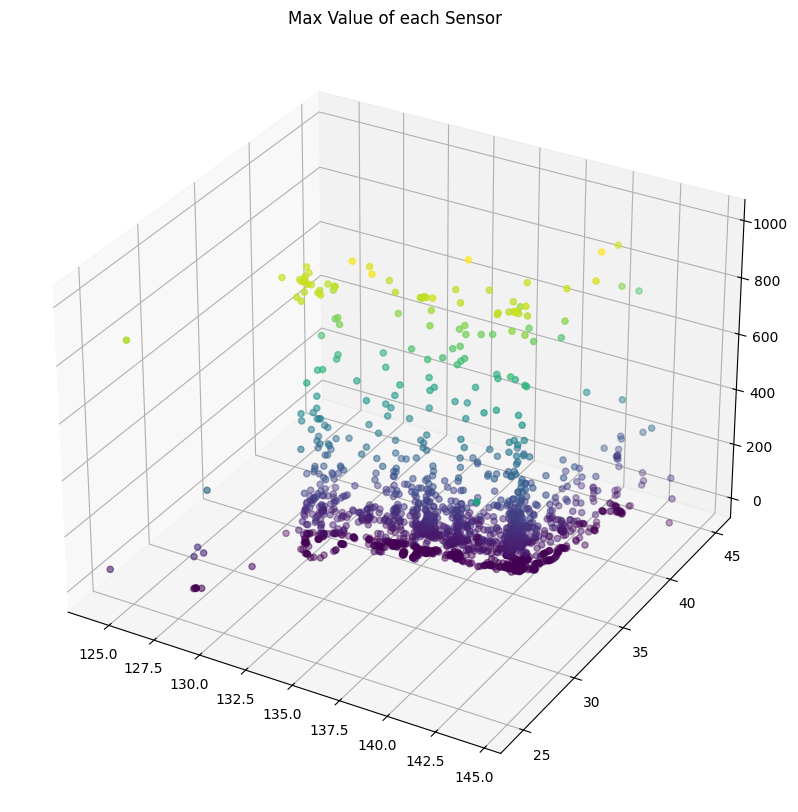

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Initialize lists for x, y, and value
x = []
y = []
value = []



# take the index of the max value of each sensor
for i in range(len(maxVal)):
    # print(maxVal[i])
    # print(maxVal.index[i])
    string = maxVal.index[i]

    string = string.replace('Point(', '')
    string = string.replace(')', '')
    string = string.split(' ')

    # Handle multiple decimal points
    for j in range(len(string)):
        if string[j].count('.') > 1:
            string[j] = string[j].replace('.', '', 1)

    coords = [float(val) for val in string]
    # if x[-1] > 180 or y[-1] > 90:
    if coords[0] > 180 or coords[1] > 90 or maxVal[i] > 1000:
        continue
    
    # Convert to float and append to x, y, and value lists
    x.append(coords[0])
    y.append(coords[1])
    value.append(maxVal[i])

# Convert lists to numpy arrays
x = np.array(x)
y = np.array(y)

# Create a 3D plot
fig = plt.figure()

# increase size
plt.gcf().set_size_inches(10, 10)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, value, c=value, cmap='viridis')
plt.title('Max Value of each Sensor')
plt.show()



/tmp/ipykernel_1824953/2135316785.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if coords[0] > 180 or coords[1] > 90 or minVal[i] < -20:
/tmp/ipykernel_1824953/2135316785.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value.append(minVal[i])


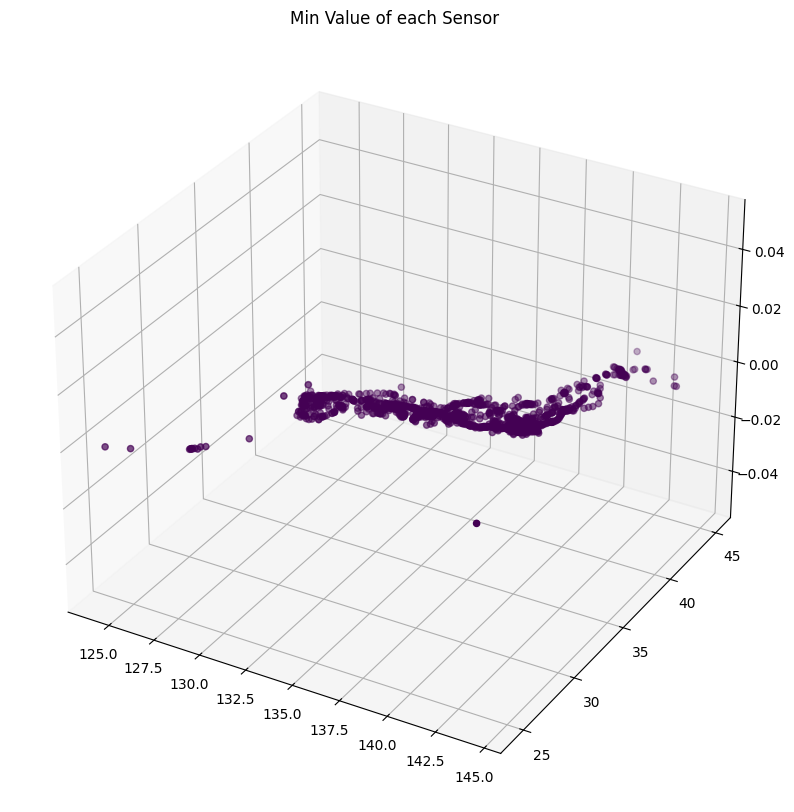

In [11]:
# Initialize lists for x, y, and value
x = []
y = []
value = []


# take the index of the max value of each sensor
for i in range(len(minVal)):
    # print(maxVal[i])
    # print(maxVal.index[i])
    string = minVal.index[i]

    string = string.replace('Point(', '')
    string = string.replace(')', '')
    string = string.split(' ')

    # Handle multiple decimal points
    for j in range(len(string)):
        if string[j].count('.') > 1:
            string[j] = string[j].replace('.', '', 1)

    coords = [float(val) for val in string]
    # if x[-1] > 180 or y[-1] > 90:
    if coords[0] > 180 or coords[1] > 90 or minVal[i] < -20:
        continue
    
    # Convert to float and append to x, y, and value lists
    x.append(coords[0])
    y.append(coords[1])
    value.append(minVal[i])

# Convert lists to numpy arrays
x = np.array(x)
y = np.array(y)

# Create a 3D plot
fig = plt.figure()
plt.gcf().set_size_inches(10, 10)


ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, value, c=value, cmap='viridis')
plt.title('Min Value of each Sensor')
plt.show()



/tmp/ipykernel_1824953/1009497821.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value.append(avgVal[i])


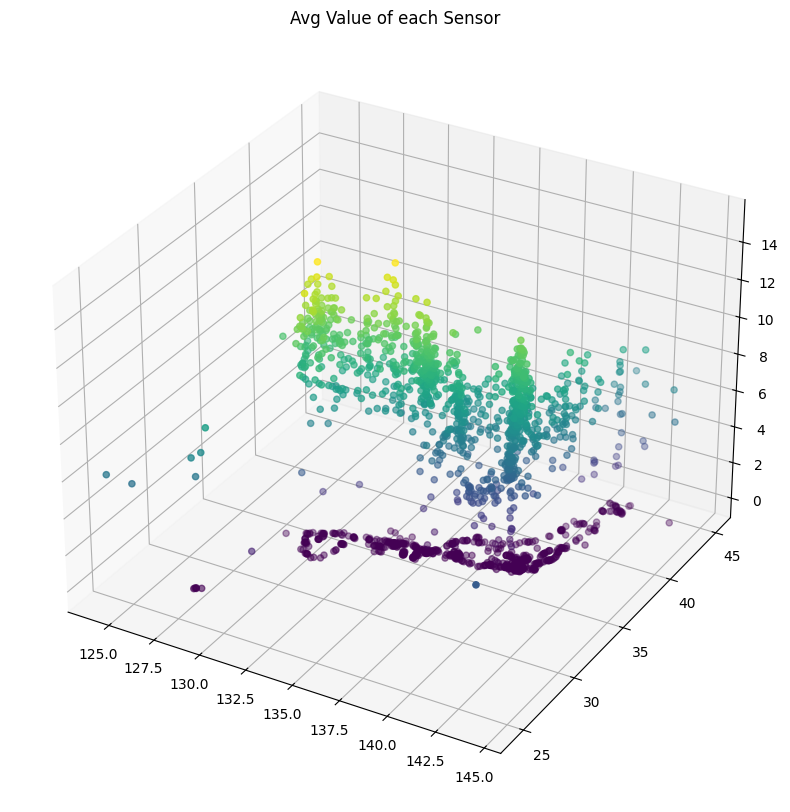

In [12]:
# Initialize lists for x, y, and value
x = []
y = []
value = []


# take the index of the max value of each sensor
for i in range(len(avgVal)):
    # print(maxVal[i])
    # print(maxVal.index[i])
    string = avgVal.index[i]

    string = string.replace('Point(', '')
    string = string.replace(')', '')
    string = string.split(' ')

    # Handle multiple decimal points
    for j in range(len(string)):
        if string[j].count('.') > 1:
            string[j] = string[j].replace('.', '', 1)

    coords = [float(val) for val in string]
    # if x[-1] > 180 or y[-1] > 90:
    if coords[0] > 180 or coords[1] > 90:
        continue
    
    # Convert to float and append to x, y, and value lists
    x.append(coords[0])
    y.append(coords[1])
    value.append(avgVal[i])

# Convert lists to numpy arrays
x = np.array(x)
y = np.array(y)

# Create a 3D plot
fig = plt.figure()

plt.gcf().set_size_inches(10, 10)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, value, c=value, cmap='viridis')
plt.title('Avg Value of each Sensor')
plt.show()



<Axes: >

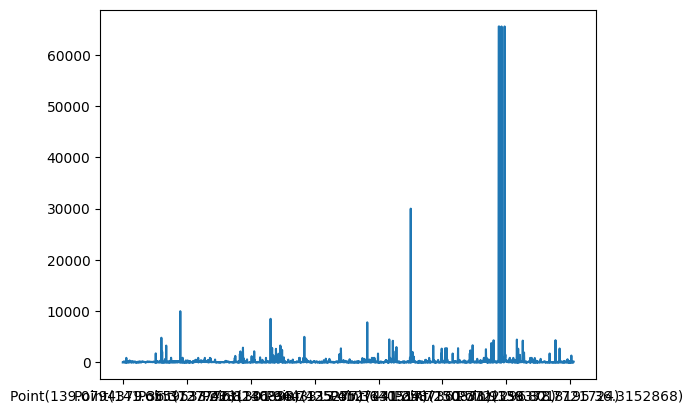

In [13]:
maxValueInEachColumn.plot()  #point the maximum values recorded by each sensor.

__Observation:__ we can see many sensors have recorded high PM2.5 values greater than 250. Such values are generally outliers/abnormalities and are not useful for the analysis.

##### Step 2.2.2: Replacing the values greater than 250 to zero.

<Axes: >

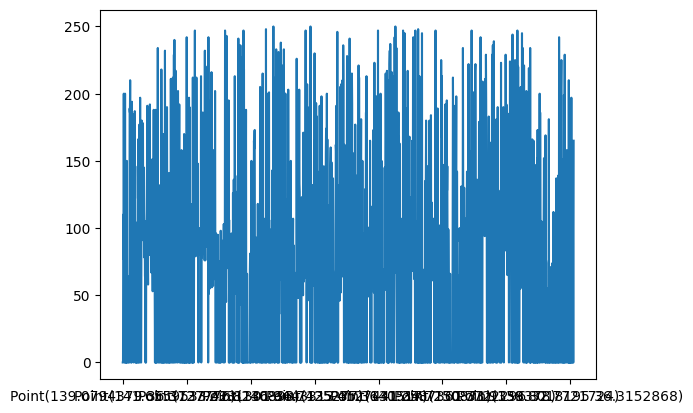

In [14]:
dataset.where(dataset <= 250, 0, inplace=True)
dataset.max().plot()

__Observation:__ We can notice that the maximum values of every sensor are no more than the 250 value.

We will now check for the minimum values recorded by the sensors.

##### Step 2.2.3: Finding the minimum values recorded by each sensor

<Axes: >

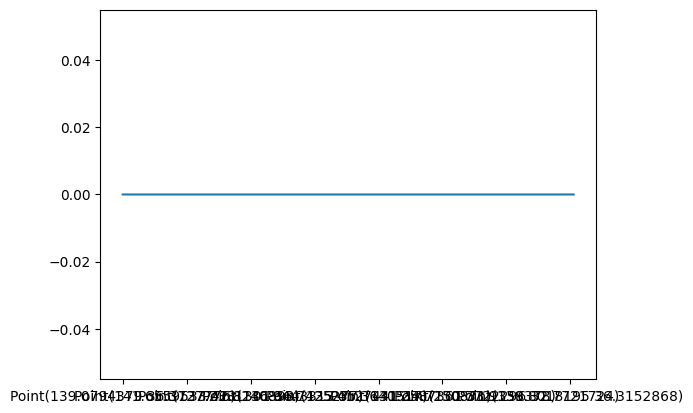

In [15]:
minValueInEachColumn = dataset.min() #Reading the minimum PM2.5 value recorded by each sensor
minValueInEachColumn.plot()  #ploting them

#dataset.min().plot()      #memory efficient approach

__Observation:__ We can observe that many sensors have recorded negative PM2.5 values. Thus, we replace the negative PM2.5 values of each sensor with Zero

##### Step 2.2.4: Replacing the values less than zero to 0

<Axes: >

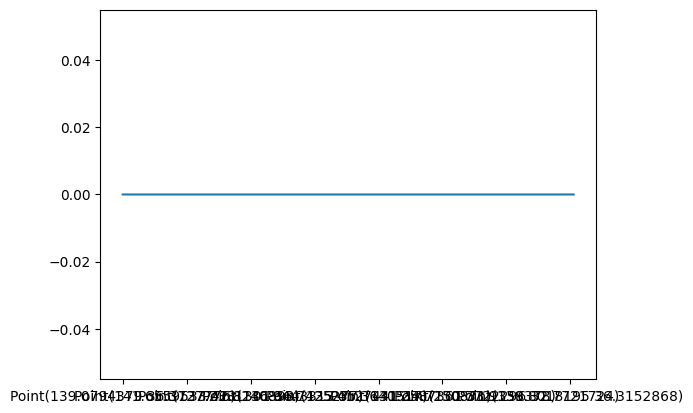

In [16]:
dataset.where(dataset > 0, 0, inplace=True)
dataset.min().plot()

__Observation:__ The abnormal values were replaced to 0.


### Step 3: Data transformation

In this step, we will transform the processed data into a binary transactional database so that we can discover frequent patterns (or areas) that have recorded high levels of pollution.

![](https://drive.google.com/uc?export=view&id=1E0CqIDShlbjBq8s2sVcMbx9w-LzQht-Y)

#### Step 3.0: We will install the latest version of PAMI package to perform

- data transformation from data frame to transactional database

- frequent pattern mining

In [17]:
!pip install -U pami

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 179.8 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.7 MB/s eta 0:00:00:00:01
  Attempting uninstall: pami
    Found existing installation: pami 2024.7.2
    Uninstalling pami-2024.7.2:
      Successfully uninstalled pami-2024.7.2

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


#### Step 3.1: Converting the data frame into a transactional database

As per the Japanese standards, the PM2.5 values greater than or equal to 35 are considered "unhealthy" for the people. Henceforth, we create a transactional database by considering the sensor values greater than or equal to 35.

In [18]:
#TIME TAKING PROCESS DEPENDING ON THE DATA.

from PAMI.extras.convert import denseDF2DB as db

obj = db.denseDF2DB(dataset)
obj.convert2TransactionalDatabase('PM25HeavyPollutionRecordingSensors.csv', '>=', 35)

#### Step 3.2: Printing few lines of the transactional database

In [19]:
!head PM25HeavyPollutionRecordingSensors.csv

Point(139.750635 35.7977241)	Point(139.8841693 35.8422674)	Point(139.3819898 36.2229999)	Point(139.9206727 35.684037)	Point(139.9785953 35.6880639)	Point(139.9033705 35.7876179)	Point(139.9123927 35.7995549)	Point(139.880097 35.953403)	Point(139.9035901 35.8570293)	Point(139.9012134 35.6552406)	Point(139.8356927 35.6967785)	Point(139.7209595 35.6108138)	Point(139.7054233 35.7609043)	Point(139.8257782 35.7697167)	Point(139.8045157 35.77453510000001)	Point(139.8692678 35.7864558)	Point(139.8530976 35.7608755)	Point(139.8773135 35.6821907)	Point(137.1418898 34.9626945)	Point(136.8905668 35.0122987)	Point(136.6548337 35.0051925)	Point(139.4949175 36.2914457)
Point(139.7962265 35.8959041)	Point(139.8841693 35.8422674)	Point(139.3819898 36.2229999)	Point(139.9206727 35.684037)	Point(139.9785953 35.6880639)	Point(139.9033705 35.7876179)	Point(139.9123927 35.7995549)	Point(139.880097 35.953403)	Point(139.9012134 35.6552406)	Point(139.8276492 35.689975)	Point(139.8356927 35.6967785)	Point(139.7

Each line in this file represents the sensors that have recorded high levels of PM2.5 values at an hour.

### Step 4: Data Mining

Frequent pattern mining is a popular knowledge discovery technique in data mining. It aims to find those interesting hidden patterns that have appeared frequently in the data.

In this experiment, we will perform frequent pattern mining on the previously constructed PM2.5 transactioinal database and identify the locations that have recorded high levels of pollution.

### Our GDS-DST Algorithm requires the data to be preprocessed so we do that

![](https://drive.google.com/uc?export=view&id=1E3TxWjv-2uaFxoGTTRAyj6qYlelgDpIB)

In [20]:
file1 = "PM25HeavyPollutionRecordingSensors.csv"
file2 = "PM25HeavyPollutionRecordingSensors_encoded.csv"
file3 = "PM25HeavyPollutionRecordingSensors_encoder.csv"

data = []
encoder = {}

with open(file1, 'r') as f:
    for line in f:
        # data.append(line.strip().split('\t'))
        # print(data[-1])
        line = line.strip().split('\t')
        for item in line:
            if item not in encoder:
                encoder[item] = len(encoder)
        data.append([encoder[item] for item in line])

with open(file2, 'w') as f:
    for i in range(len(data)):
        f.write(str(i) + '\t' + '\t'.join([str(item) for item in data[i]]) + '\n')

with open(file3, 'w') as f:
    for item in encoder:
        f.write(item + '\t' + str(encoder[item]) + '\n')

#### Step 4.1: Understanding the distribution (or statistics) of data

Distribution of data plays a vital role in the success of a data mining task. Henceforth, let us analyze the distribution of the data.

Database size (total no of transactions) : 31462
Number of items : 1119
Minimum Transaction Size : 1
Average Transaction Size : 16.545896637213147
Maximum Transaction Size : 503
Standard Deviation Transaction Size : 39.73276427461552
Variance in Transaction Sizes : 1578.7427362530073
Sparsity : 0.9852136759274235


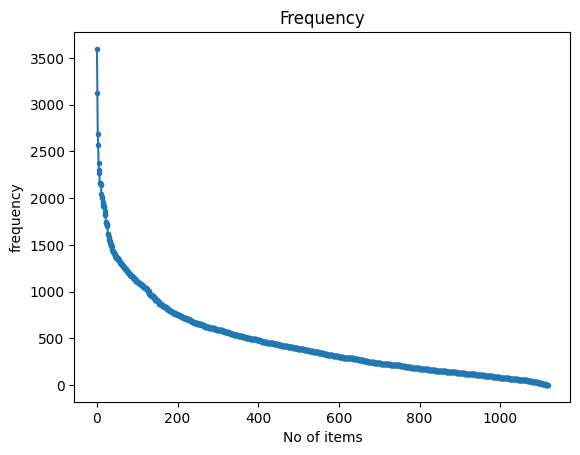

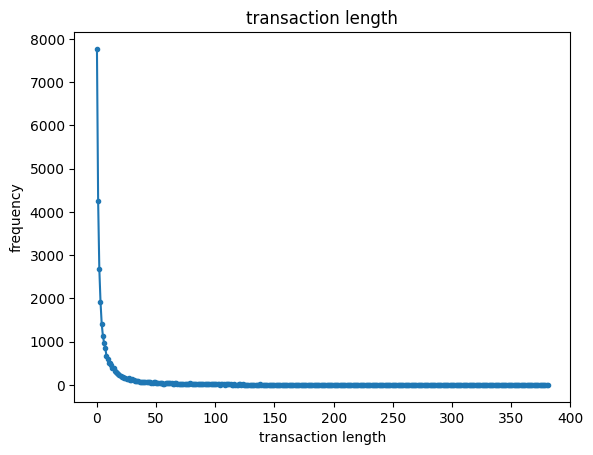

In [21]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('PM25HeavyPollutionRecordingSensors.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

#### Step 4.2: Mining Frequent Patterns using FP-growth algorithm

In [22]:
from PAMI.frequentPattern.basic import FPGrowth as ab
obj = ab.FPGrowth('PM25HeavyPollutionRecordingSensors.csv', 500) #If the execution is taking too much time, kill the process and use a higher minimum support value.
obj.mine()
obj.printResults()
obj.save('soramameFrequentPatterns_1000.txt') #It is a good practise to store the parameters used for an experiment as a file name

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total number of Frequent Patterns: 1194
Total Memory in USS: 2306772992
Total Memory in RSS 2320420864
Total ExecutionTime in ms: 3.8817012310028076


In [23]:
import cupy
import kvikio
import pandas as pd
import numpy as np
import os
import cupy as cp
import time
import psutil


count_number_of_lines = cp.RawKernel(r'''

extern "C" __global__ void count_number_of_lines(const unsigned char *data, const int size, const int newLine, int *numLines) {
    int i = blockDim.x * blockIdx.x + threadIdx.x;
    if (i < size) {
        if (data[i] == newLine) {
            atomicAdd(numLines, 1);
        }

    }
}

''', 'count_number_of_lines')

line_bounds_and_timestamp = cp.RawKernel(r'''
                                
    __device__ int my_atoi(const char *str) {
        int result = 0;
        int sign = 1;
        int i = 0;

        // Skip any leading spaces
        while (str[i] == ' ') {
            i++;
        }

        // If the number is negative, update the sign and start position
        if (str[i] == '-') {
            sign = -1;
            i++;
        }

        // Iterate over each character and construct the integer
        for (; str[i] != '\0'; ++i) {
            if (str[i] < '0' || str[i] > '9') {
                break; // Break if a non-numeric character is encountered
            }
            result = result * 10 + (str[i] - '0');
        }

        return sign * result;
    }

    extern "C" __global__ void line_bounds_and_timestamp(const unsigned char *data, const int size, 
                                            const int newLine, int *indexes, int *timestamps, const int separator) {
        int i = blockDim.x * blockIdx.x + threadIdx.x;
        if (i < size) {
            if (data[i] == newLine) {
                // Atomically increment the index count and get the current index
                int index = atomicAdd(indexes, 1);
                indexes[index + 1] = i + 1;

                // Locate the separator and extract the integer value
                int j = i + 1;
                int count = 0;
                while (j < size && data[j] != newLine) {
                    if (data[j] == separator) {
                        break;
                    }
                    j++;
                }

                // Make sure the timestamp array is large enough and null-terminate it
                char timestamp[32];  // Assuming the timestamp will not exceed 31 characters
                for (int k = i + 1; k < j && count < sizeof(timestamp) - 1; k++) {
                    timestamp[count++] = data[k];
                }
                timestamp[count] = '\0';

                // Convert the extracted substring to an integer using the custom function
                timestamps[index] = my_atoi(timestamp);
            }
        }
    }


    ''', 'line_bounds_and_timestamp')


get_items_per_line = cp.RawKernel(r'''
extern "C" __global__ void get_items_per_line(const unsigned char *data,
                                const int *indexes, const int numLines, int *items_per_line, const int seperator) {
    int i = blockDim.x * blockIdx.x + threadIdx.x;
    if (i < numLines) {
        for (int j = indexes[i]; j < indexes[i + 1]; j++) {
            if (data[j] == seperator) {
                atomicAdd(&items_per_line[i + 1], 1);
            }
        }
    }
}
''', 'get_items_per_line')


convert_char_file_to_int_file = cp.RawKernel(r'''
                            
__device__ int my_atoi(const char *str) {
    int result = 0;
    int sign = 1;
    int i = 0;

    // Skip any leading spaces
    while (str[i] == ' ') {
        i++;
    }

    // If the number is negative, update the sign and start position
    if (str[i] == '-') {
        sign = -1;
        i++;
    }

    // Iterate over each character and construct the integer
    for (; str[i] != '\0'; ++i) {
        if (str[i] < '0' || str[i] > '9') {
            break; // Break if a non-numeric character is encountered
        }
        result = result * 10 + (str[i] - '0');
    }

    return sign * result;
}


extern "C" __global__ void convert_char_file_to_int_file(const unsigned char *data, const int *indexes, const int numLines, const int *itemsPerLine, int *rawData, const int seperator) {
    int tid = blockDim.x * blockIdx.x + threadIdx.x;
    if (tid >= numLines) return;
                            
    int start = indexes[tid];
    int end = indexes[tid + 1];
    char buffer[32];
    int bufferIndex = 0;

    int j = itemsPerLine[tid];

    while (data[start] != seperator) {
            start++;
        }
        start++;

        for (int k = start; k < end; k++) {
            if (data[k] != seperator) {
                buffer[bufferIndex++] = data[k];
            }
            else {
                buffer[bufferIndex] = '\0';
                rawData[j++] = my_atoi(buffer);
                bufferIndex = 0;
            }
        }
        rawData[j] = my_atoi(buffer);
                            
}

''', 'convert_char_file_to_int_file')

get_items_supports = cp.RawKernel(r'''

extern "C" __global__ void get_items_supports(const int *rawData, const int rawDataSize, int *supports) {
    int i = blockDim.x * blockIdx.x + threadIdx.x;
    if (i > rawDataSize) return;
    atomicAdd(&supports[rawData[i]], 1);
}

''', 'get_items_supports')


create_bitset_for_items = cp.RawKernel(r'''

extern "C" __global__ void create_bitset_for_items(const int *rawData, const int *indexes, const int numLines, 
                                unsigned int *bitSets, const int bitsetSize, int *timestamps, int *bitIndexLoc, const int *valid, int *supports) {
    int i = blockDim.x * blockIdx.x + threadIdx.x;
    if (i >= numLines) return;

    int start = indexes[i];
    int end = indexes[i + 1];
    int bitIndex = timestamps[i] % 32;
    int bitSetIndex = timestamps[i] / 32;


    for (int j = start; j < end; j++) {
        int item = rawData[j];

        if (!valid[item]) continue;

        int location = bitIndexLoc[item];
        atomicAdd(&supports[location], 1);
        if (bitIndex < 32) {
            atomicOr(&bitSets[(location * bitsetSize) + bitSetIndex], 1 << (31 - bitIndex));
        }
    }
}


''', 'create_bitset_for_items')

get_items_periodicity = cp.RawKernel(
    r"""
                
#define int32_t int
#define uint32_t unsigned int

extern "C" __global__
void get_items_periodicity(
    uint32_t *bitValues, uint32_t arraySize,
    uint32_t numberOfKeys,
    uint32_t *period, uint32_t maxPeriod, uint32_t maxTimeStamp
)
{
    uint32_t tid = threadIdx.x + blockIdx.x * blockDim.x;

    if (tid >= numberOfKeys) return;

    uint32_t intersection = 0;
    uint32_t lastSetBit = 0;
    uint32_t maxPeriodFound = 0;
    uint32_t traversed = 0;

    uint32_t prev = 0;

    for (uint32_t i = 0; i < arraySize; i++) {

        intersection = bitValues[tid * arraySize + i];
        uint32_t mask = 1 << 31;

        for (int32_t j = 0; j < 32; j++) {

            if (intersection & mask) { 
                uint32_t diff = traversed - lastSetBit;
                if (diff > maxPeriodFound) {
                    maxPeriodFound = diff;
                }
                lastSetBit = traversed;
            }

            mask >>= 1;

            if (traversed == maxTimeStamp + 2) {
                break;
            }
            traversed++;

        }
    }

    if (maxTimeStamp - lastSetBit > maxPeriodFound) {
        maxPeriodFound = maxTimeStamp - lastSetBit;
    }

    
    period[tid] = maxPeriodFound;
}


""",
    "get_items_periodicity",
)


number_of_new_candidates_to_generate = cp.RawKernel(
    r"""

#define uint32_t unsigned int

extern "C" __global__
void number_of_new_candidates_to_generate(
    uint32_t *candidates, uint32_t numberOfKeys, 
    uint32_t keySize, uint32_t *numNewCands
    )
{
    uint32_t tid = threadIdx.x + blockIdx.x * blockDim.x;
    if (tid >= numberOfKeys) return;
                            
    uint32_t i = tid;
    
    if (keySize == 1)
    {
        numNewCands[i + 1] = numberOfKeys - i - 1;
        return;
    }
    
    for (uint32_t j = i + 1; j < numberOfKeys; j++)
    {
        for (uint32_t k = 0; k < keySize; k++)
        {
            if (k == keySize - 1)
            {
                numNewCands[i + 1] += 1;                     
            }
            else
            {
                if (candidates[i * keySize + k] != candidates[j * keySize + k])
                {
                    return;
                }
            }
        }
    }
}
                            """,
    "number_of_new_candidates_to_generate",
)


write_the_new_candidates = cp.RawKernel(
    r"""

#define uint32_t unsigned int
extern "C" __global__
void write_the_new_candidates(
    uint32_t *candidates, uint32_t numCands, uint32_t candSize,
    uint32_t *newCandidatesIndex, uint32_t *newCandidates
)
{
    uint32_t tid = threadIdx.x + blockIdx.x * blockDim.x;
    if (tid > 0) return;
    int index = 0;
    for (int i = 0; i < numCands; i++)
    {
        if (newCandidatesIndex[i] == newCandidatesIndex[i + 1]) continue;

        int numNewCands = newCandidatesIndex[i + 1] - newCandidatesIndex[i];

        for (int j = 0; j < numNewCands; j++)
        {
            for (int k = 0; k < candSize; k++)
            {
                newCandidates[index++] = candidates[i * candSize + k];
            }
            newCandidates[index++] = candidates[(i + 2 + j) * candSize - 1];
        }
    }
    
}

                            
                            """,
    "write_the_new_candidates",
)


supportAndPeriod = cp.RawKernel(
    r"""
                
#define int32_t int
#define uint32_t unsigned int
    
extern "C" __global__
void supportAndPeriod(
    uint32_t *bitValues, uint32_t arraySize,
    uint32_t *candidates, uint32_t numberOfKeys, uint32_t keySize,
    uint32_t *support, uint32_t *period,
    uint32_t maxPeriod, uint32_t maxTimeStamp
    )
{
    uint32_t tid = threadIdx.x + blockIdx.x * blockDim.x;
    if (tid >= numberOfKeys) return;

    uint32_t intersection = 0;
    uint32_t supportCount = 0;
    uint32_t periodCount = 0;
    uint32_t traversed = 0;

    // Loop over the bitValues array
    for (uint32_t i = 0; i < arraySize; i++)
    {
        intersection = 0xFFFFFFFF;  // Start with all bits set to 1
        for (uint32_t j = tid * keySize; j < (tid + 1) * keySize; j++)
        { 
            intersection &= bitValues[candidates[j] * arraySize + i];
        }

        // Count the number of 1s in the intersection
        support[tid] += __popc(intersection);

        // Traverse the bits from MSB to LSB using a mask
        uint32_t mask = 1 << 31;  // Start with the most significant bit
        
        for (int32_t j = 0; j < 32; j++) {
            periodCount++;
            traversed++;
            if (periodCount > maxPeriod) {
                period[tid] = periodCount;
                return;
            }
            
            // Check the current bit using the mask
            if (intersection & mask) { // If the current bit is 1
                supportCount++;
                if (periodCount > period[tid])
                    period[tid] = periodCount;
                periodCount = 0;
            }

            // Shift the mask to the right to check the next bit
            mask >>= 1;

            if (traversed == maxTimeStamp + 1) {
                if (periodCount > period[tid])
                    period[tid] = periodCount;
                return;
            }
        }
    }
}
""",
    "supportAndPeriod",
)

class cuPFPMiner:
    def __init__(self, file, minSup, maxPer, sep, output_file):
        self.file = file
        self.minSup = minSup
        self.maxPer = maxPer
        self.sep = sep
        self.output_file = kvikio.CuFile(output_file, "w")

        # warm up the GPU
        with kvikio.CuFile(file, "r") as f:
            pass
    
    def readFile(self, blockSize = 32):
        # Get file size to allocate memory in GPU
        file_size = os.path.getsize(self.file)

        # Allocate memory in GPU
        file_data = cp.empty(file_size * 8, dtype=cp.uint8)

        # Read file data
        with kvikio.CuFile(self.file , "r") as f:
            f.read(file_data)

        # Convert seperator and new line to bytes to find them in the file
        new_line = "\n"
        seperator_byte = ord(self.sep)
        new_line_byte = ord(new_line)

        # Allocate memory in GPU for number of lines and timestamps
        number_of_lines = cp.array([0], dtype=cp.int32)
        count_number_of_lines((file_size//blockSize + 1,), (blockSize,), (file_data, file_size, new_line_byte, number_of_lines)) 

        number_of_lines = number_of_lines[0].get()

        indexes = cp.zeros(number_of_lines + 1, dtype=cp.int32)
        timestamps = cp.zeros(number_of_lines, dtype=cp.int32)

        # Find line bounds and timestamps
        line_bounds_and_timestamp((file_size//blockSize + 1,), (blockSize,), (file_data, file_size, new_line_byte, indexes, timestamps, seperator_byte))

        # Sort indexes
        indexes[0] = 0  
        indexes = cp.sort(indexes)

        # get first timestamp because it is not calculated in the kernel function
        data = file_data[0:indexes[1]].get()
        buffer = []
        for i in range(data.size):
            buffer.append(int(data[i]))
            if data[i] == seperator_byte:
                buffer.pop()
                break
        
        timestamp = ""
        for i in range(len(buffer)):
            timestamp += chr(buffer[i])

        timestamps = cp.sort(timestamps).astype(cp.int32)
        timestamps[0] = int(timestamp)

        # Allocate memory for items per line to calculate the number of items in each line
        items_per_line = cp.zeros(number_of_lines + 1, dtype=cp.int32)
        get_items_per_line((file_size//blockSize + 1,), (blockSize,), (file_data, indexes, number_of_lines, items_per_line, seperator_byte))

        # Calculate the number of items in the file
        items_per_line = cp.cumsum(items_per_line).astype(cp.int32)
        number_of_items = items_per_line[number_of_lines].get()

        raw_data = cp.zeros(number_of_items, dtype=cp.int32)
        convert_char_file_to_int_file((file_size//blockSize + 1,), (blockSize,), (file_data, indexes, number_of_lines,items_per_line, raw_data, seperator_byte))

        mempool = cp.get_default_memory_pool()

        # Get the total memory allocated by CuPy (in bytes)
        total_memory = mempool.total_bytes()

        # Get the memory currently in use (in bytes)
        used_memory = mempool.used_bytes()
        self.file_memory = used_memory
        print("File Memory: ", self.file_memory)

        del file_data
        del data
        del indexes
        del buffer
        del timestamp

        return raw_data, items_per_line, timestamps, number_of_lines, number_of_items

    def mine(self, blockSize = 32):
        start = time.time()
        raw_data, line_bounds, timestamps, number_of_lines, number_of_items = self.readFile(blockSize)
        # print("Time to read file: ", time.time() - start)

        unique_items = cp.unique(raw_data)
        largest_item = int(cp.max(unique_items))

        item_supports = cp.zeros(largest_item + 2, dtype=cp.int32) # +2 to avoid out of bound error for conversion
        get_items_supports((number_of_items//blockSize + 1,), (blockSize,), (raw_data, number_of_items, item_supports))

        item_supports = cp.where(item_supports < self.minSup, 0, 1).astype(cp.int32)
        
        validty = item_supports

        rename_old_to_new = validty.copy()
        rename_old_to_new = cp.roll(rename_old_to_new, 1)
        rename_old_to_new = cp.cumsum(rename_old_to_new).astype(cp.int32)
        self.output_file.write(rename_old_to_new)

        integers_per_item_for_bitsets = number_of_lines // 32 + 1
        number_of_valid_items = int(rename_old_to_new[-1].get()) + 1

        supports = cp.zeros(number_of_valid_items, dtype=cp.int32)
        bitsets = cp.zeros((number_of_valid_items, integers_per_item_for_bitsets), dtype=cp.uint32)

        create_bitset_for_items((number_of_lines//blockSize + 1,), (blockSize,), 
        (raw_data, line_bounds, number_of_lines, bitsets, integers_per_item_for_bitsets, timestamps, rename_old_to_new, validty, supports))

        periodicity = cp.zeros(number_of_valid_items, dtype=cp.int32)
        max_timestamp = int(cp.max(timestamps))

        get_items_periodicity((largest_item//blockSize + 1,), (blockSize,), (bitsets, integers_per_item_for_bitsets, number_of_valid_items, periodicity, self.maxPer, max_timestamp))

        candidates = cp.where((supports >= self.minSup) & (periodicity <= self.maxPer))[0].astype(cp.uint32)
        key_size = 1

        patterns = len(candidates)

        while len(candidates) > 1:
            # print("Number of Candidates: ", len(candidates))
            num_new_candidates = cp.zeros(len(candidates) + 1, dtype=cp.uint32)
            number_of_new_candidates_to_generate((len(candidates)//blockSize + 1,), (blockSize,), (candidates, len(candidates), key_size, num_new_candidates))

            new_candidates_index = cp.cumsum(num_new_candidates).astype(cp.uint32)
            num_new_candidates = new_candidates_index[-1].get()

            new_candidates = cp.zeros((num_new_candidates,(key_size + 1)), dtype=cp.uint32)
            write_the_new_candidates((num_new_candidates//blockSize + 1,), (blockSize,), (candidates, len(candidates), key_size, new_candidates_index, new_candidates))

            key_size += 1

            supports = cp.zeros(num_new_candidates, dtype=cp.int32)
            periodicity = cp.zeros(num_new_candidates, dtype=cp.int32)
            supportAndPeriod((num_new_candidates//blockSize + 1,), (blockSize,), 
                (bitsets, integers_per_item_for_bitsets, new_candidates, num_new_candidates, cp.int32(key_size),
                supports, periodicity, self.maxPer, max_timestamp))
            cp.cuda.device.Device().synchronize()

            locations = cp.where((supports >= self.minSup) & (periodicity <= self.maxPer))[0].astype(cp.uint32)

            self.output_file.write(num_new_candidates)
            self.output_file.write(cp.int32(key_size))
            self.output_file.write(candidates[locations])
            self.output_file.write(supports[locations])
            self.output_file.write(periodicity[locations])

            candidates = new_candidates[locations].astype(cp.uint32)


            patterns += len(candidates)


        self.number_of_patterns = patterns
        self.runtime = time.time() - start
        pid = os.getpid()
        pid = psutil.Process(pid)
        self.memoryRSS = pid.memory_info().rss
        self.memoryUSS = pid.memory_full_info().uss
        mempool = cp.get_default_memory_pool()

        # Get the total memory allocated by CuPy (in bytes)
        total_memory = mempool.total_bytes()

        # Get the memory currently in use (in bytes)
        used_memory = mempool.used_bytes()

        self.GPU_memory = used_memory

    def getRuntime(self):
        return self.runtime

    def getMemoryRSS(self):
        return self.memoryRSS
    
    def getMemoryUSS(self):
        return self.memroyUSS

    def getMemoryGPU(self):
        return self.GPU_memory

    def printResults(self):
        print("Number of Patterns: ", self.number_of_patterns)
        print("Runtime: ", self.runtime)
        print("Memory RSS: ", self.memoryRSS)
        print("Memory USS: ", self.memoryUSS)
        print("GPU Memory: ", self.GPU_memory)



ModuleNotFoundError: No module named 'kvikio'

In [ ]:
file2 = "PM25HeavyPollutionRecordingSensors_encoded.csv"
obj = cuPFPMiner(file2, 300,100000,"\t", 'test.txt')
obj.mine()
obj.printResults()

***

### Step 5: Interpretation and Evaluation.

In this step, we will spatially visualize top-10 long patterns and make necessary interpretations.

![](https://drive.google.com/uc?export=view&id=1DwRdNbPphDKLGjoZy2bs2JoR53bjfGFY)

In [ ]:
from PAMI.extras.graph import visualizePatterns as fig

obj = fig.visualizePatterns('soramameFrequentPatterns_1000.txt',10)
obj.visualize(width=1000,height=900)

**Knowledge**

The following interpretations can drawn from these figures:

1. Costal areas are observing high levels of pollution

2. Pollution was observed highly at Kyushu and Tokyo.

**References:**


1.   RAGE, Uday kiran (2023), “5+ Years of Multiple Time Series Data of Hourly PM2.5 Recordings Gathered from Various Sensors Located throughout Japan (1-1-2018 to 25-4-2023)”, Mendeley Data, V1, doi: 10.17632/phgrnvykmr.1
2.   PAMI: PAttern Mining toolkit. https://github.com/UdayLab/PAMI

